In [18]:
import numpy as np
print(np.version.version)
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
from numpy import diff
import pandas as pn
import math
import scipy.constants as sc
import pickle
import copy
from scipy import interpolate
from matplotlib import rcParams, cycler, cm, rc
plotall = True
overview_plot = True
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show,pcolor
import pandas as pd
import os
import matplotlib.ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from numpy.polynomial import Polynomial

1.24.3


In [19]:
%run NNO_Functions_FM318.ipynb

# Folder Paths #

In [20]:
"---Folder Paths---"


folder_hall_film_cleaned = r"C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned"
pathlist_hall_film_cleaned = folderpath(folder_hall_film_cleaned)

print(pathlist_hall_film_cleaned)




['C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0001 - 1800_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_50K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0002 - 2138_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_75K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0003 - 1050_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_100K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0004 - 1449_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_125K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0006 - 2113_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_150K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0008 - 1356_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-10_175K.txt', 'C:\\Users\\pblah\\Data\\Navy Beach\\FM318\\Film\\Hall\\Cleaned\\0009 - 1730_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-10

# Temperature List #

In [21]:
def findtemperature(array):
    F = int(len(array))
    Temperature_list = []
    for i,path in enumerate(array):
        file = path[F::]
        T_index_max = file.find('K.')
        string_tmp = file[T_index_max-6:T_index_max]
        T_index_min = string_tmp.find('_')
        Temperature = string_tmp[T_index_min+1::]
        Temperature=float(Temperature)      
        Temperature_list = np.append(Temperature_list,Temperature)
        Temperature_list = np.round(Temperature_list)
    return Temperature_list   

## Closest Element Function ##

In [22]:
def closest_element(array,value):
    element = min(array, key=lambda x:abs(x-value))
    closest_element = np.where(array == element)[0][0]
    return closest_element

## Closest Element Range Function ##

In [23]:
def closest_element_index(array,value):
    array1 = np.sort(array)
    closest_element = min(array1, key=lambda x:abs(x-value))
    closest_element_index = np.where(array1 == closest_element)[0][0]
    closest_index_range = array1[closest_element_index-1 : closest_element_index+1]
    mylist = []
    for i in closest_index_range:
        closest_index_actual = np.where(array == i)[0]
        mylist = np.sort(np.append(mylist,closest_index_actual))
    return mylist

# Hall #

## Raw ##

i 0
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0001 - 1800_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_50K.txt


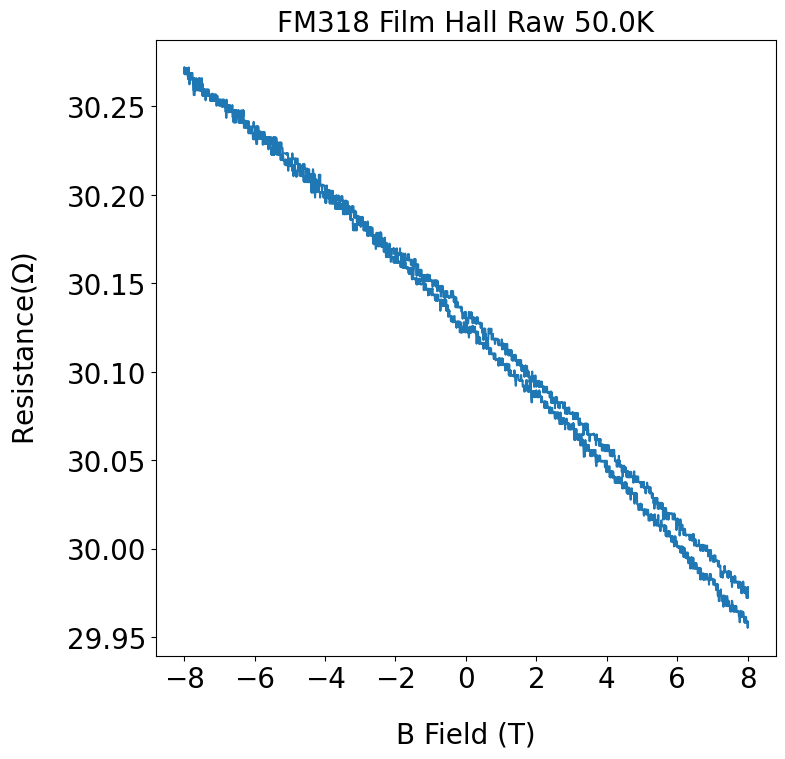

i 1
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0002 - 2138_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_75K.txt


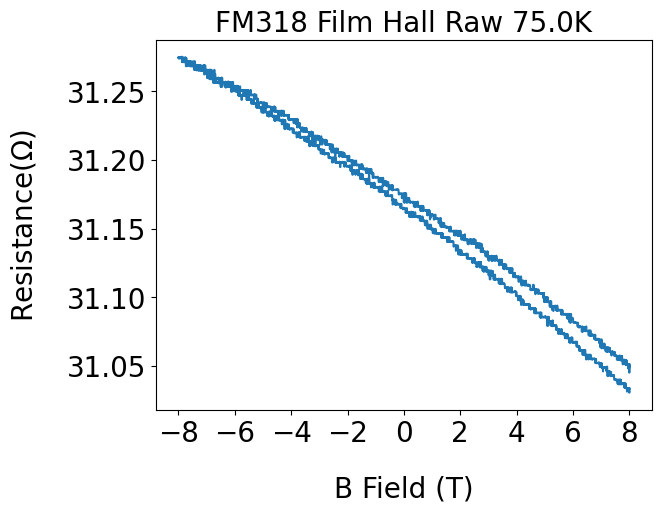

i 2
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0003 - 1050_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_100K.txt


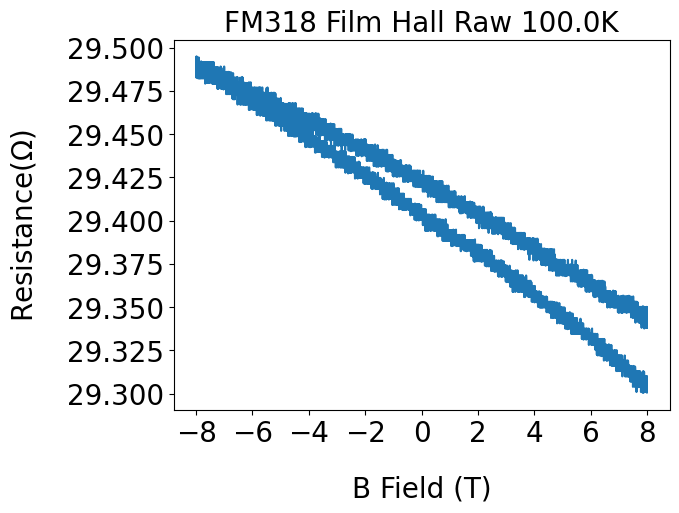

i 3
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0004 - 1449_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_125K.txt


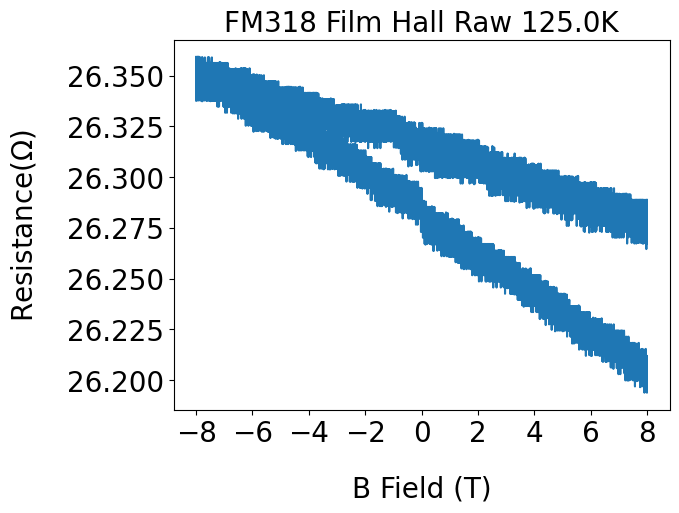

i 4
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0006 - 2113_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_150K.txt


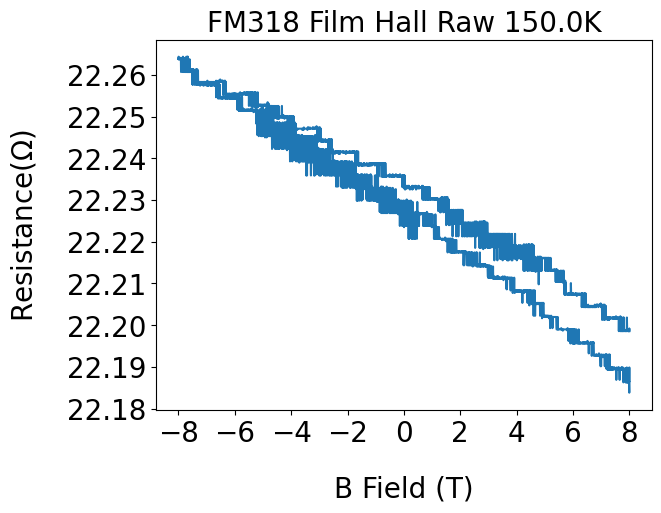

i 5
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0008 - 1356_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-10_175K.txt


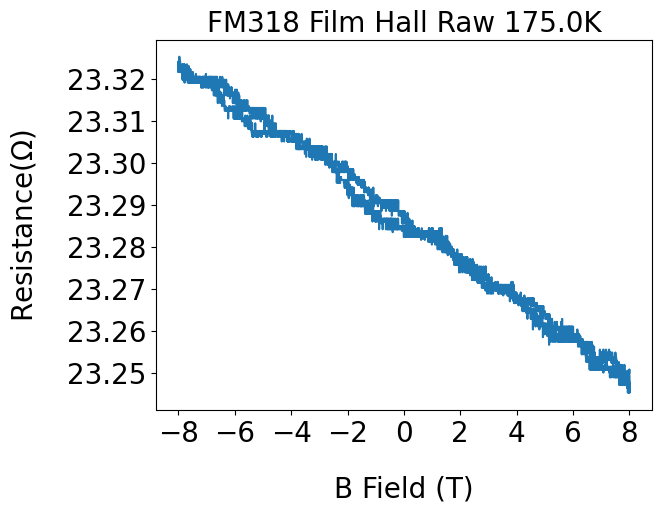

i 6
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0009 - 1730_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_200K.txt


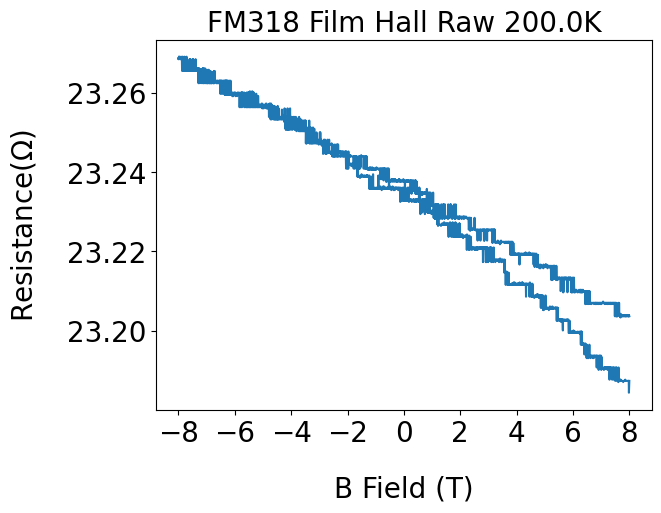

i 7
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0010 - 2104_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_225K.txt


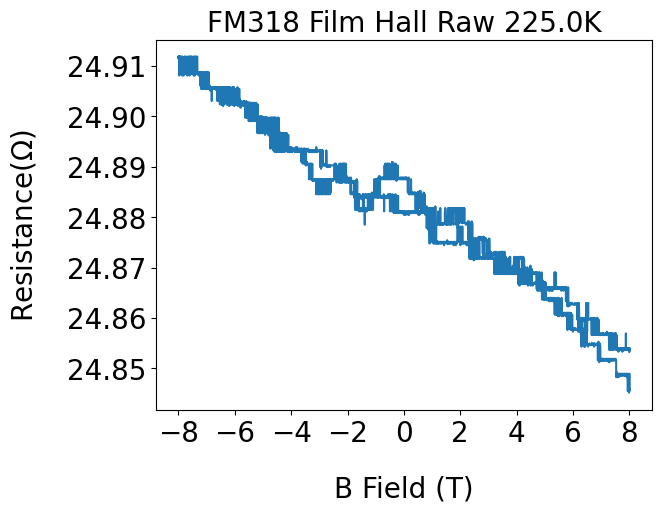

i 8
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0011 - 1547_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_250K.txt


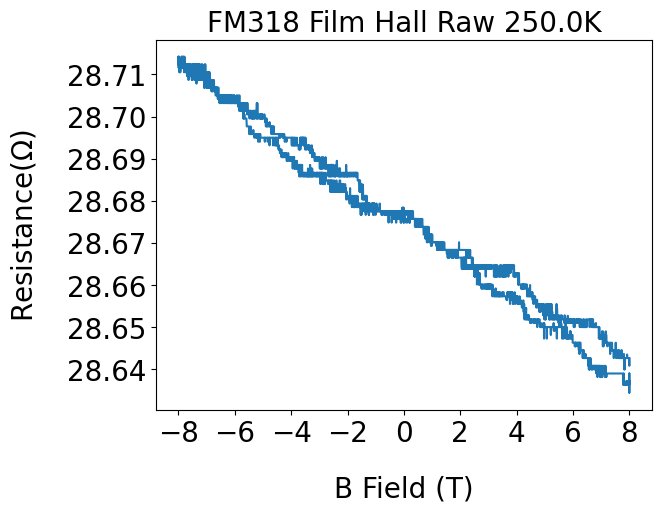

i 9
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0012 - 1931_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_275K.txt


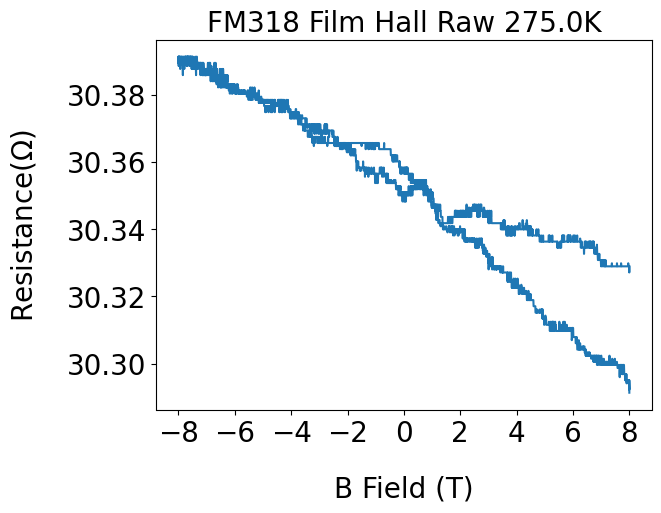

i 10
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0013 - 2239_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_293K.txt


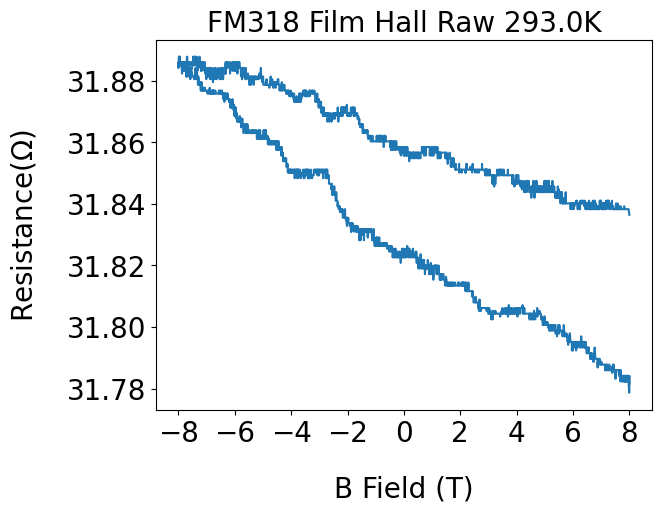

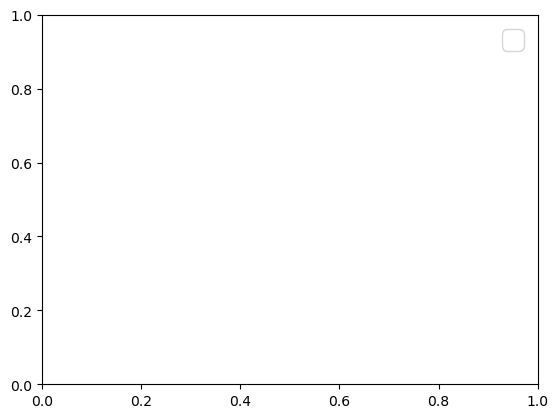

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

temperature_list = findtemperature(pathlist_hall_film_cleaned)



for i,data in enumerate(pathlist_hall_film_cleaned):
    
    print("i",i)
    print("data",data)


    
    dataextracted = dataextractorMagneto(data)
    B = dataextracted[8]
    resistance4pt = dataextracted[5]
    resitivity4pt = resistance4pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6
    plt.plot(B,resistance4pt)
    plt.title("FM318 Film Hall Raw" + " " +  str(temperature_list[i]) + "K",fontsize = 20)
    plt.ylabel(r'Resistance($\Omega$)',fontsize =20, labelpad = 20)
    plt.xlabel("B Field (T)",fontsize =20, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
plt.legend(temperature_list, fontsize = 20)


## 0T Offset Removed ##

i 0
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0001 - 1800_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_50K.txt


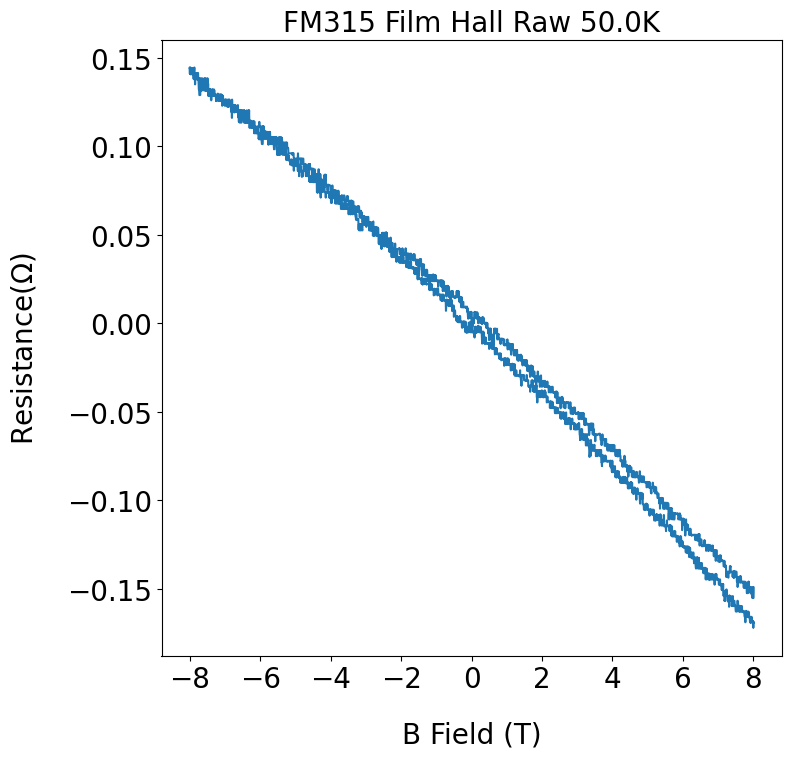

i 1
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0002 - 2138_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_75K.txt


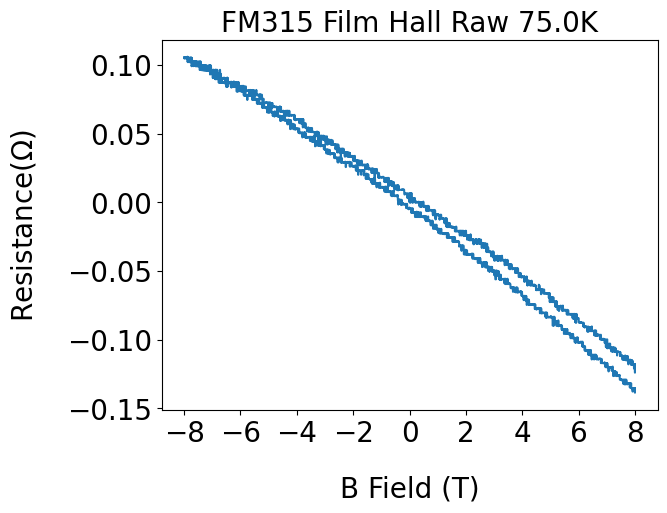

i 2
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0003 - 1050_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_100K.txt


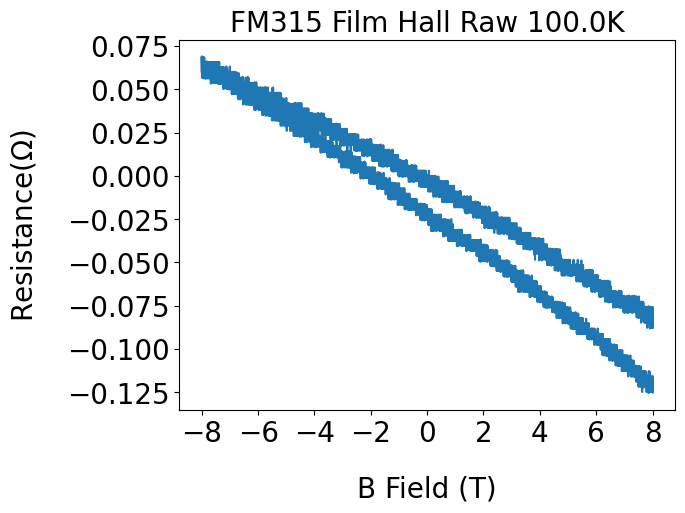

i 3
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0004 - 1449_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_125K.txt


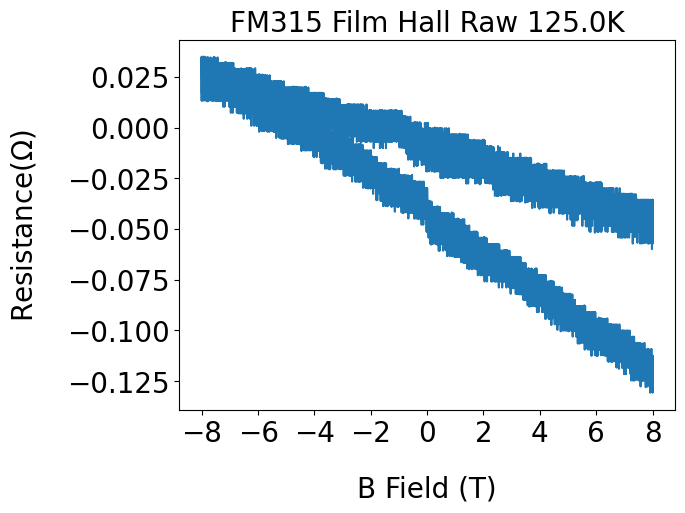

i 4
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0006 - 2113_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_150K.txt


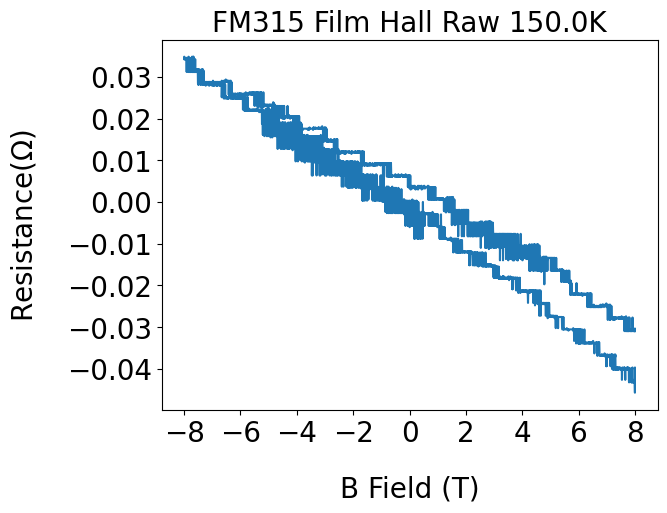

i 5
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0008 - 1356_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-10_175K.txt


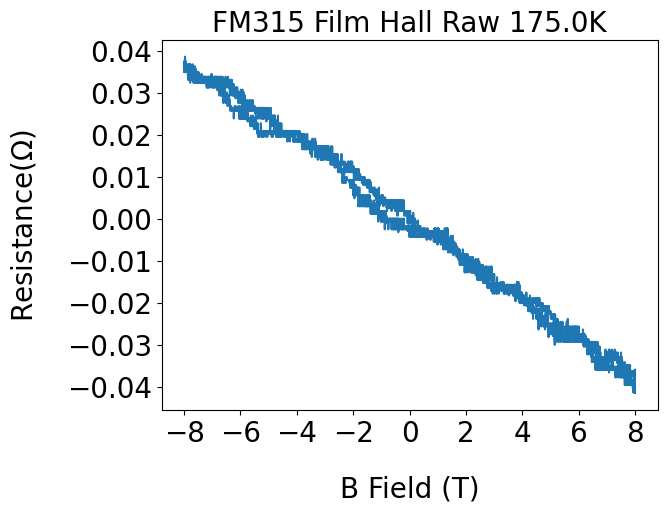

i 6
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0009 - 1730_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_200K.txt


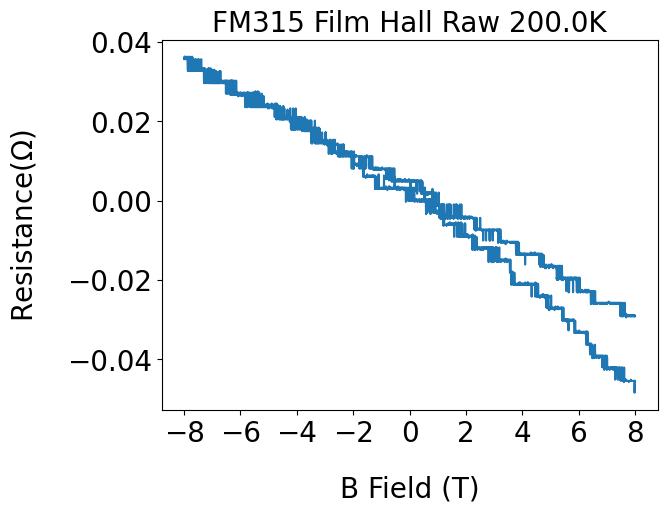

i 7
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0010 - 2104_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_100uA_gains_1-100_225K.txt


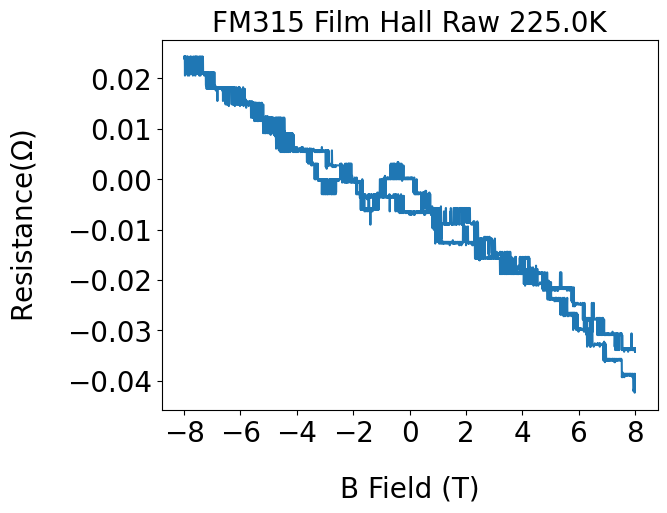

i 8
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0011 - 1547_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_250K.txt


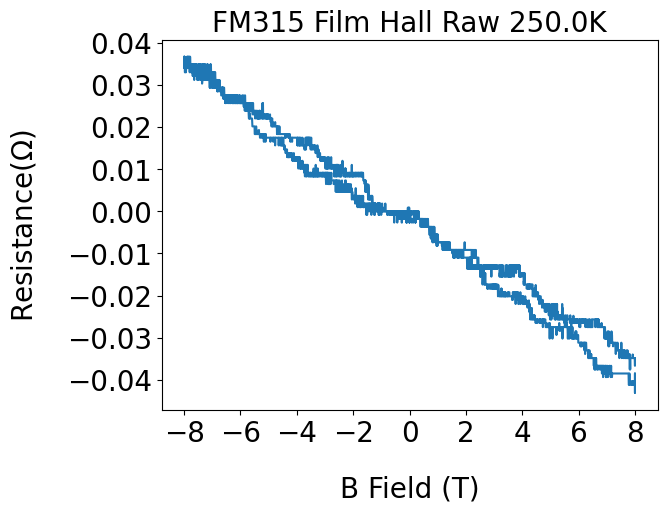

i 9
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0012 - 1931_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_275K.txt


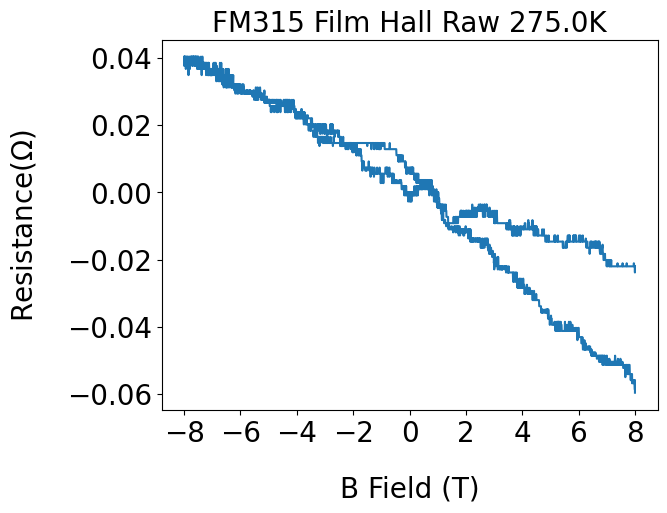

i 10
data C:\Users\pblah\Data\Navy Beach\FM318\Film\Hall\Cleaned\0013 - 2239_1435_FM318_Film_Hall_I_11-5_V1_11_5_V2_12-6_200uA_gains_1-10_293K.txt


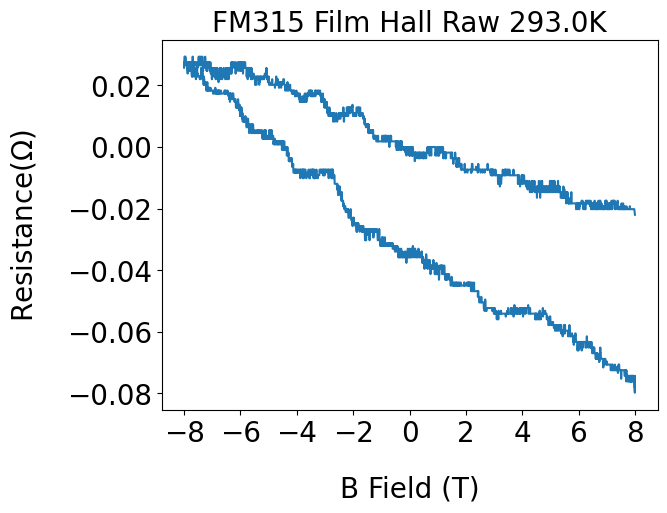

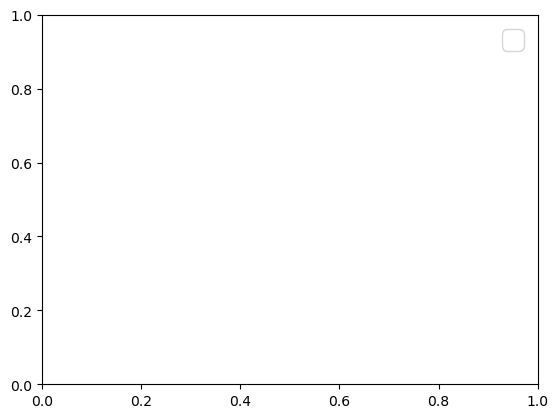

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

temperature_list = findtemperature(pathlist_hall_film_cleaned)



for i,data in enumerate(pathlist_hall_film_cleaned):
    
    print("i",i)
    print("data",data)


    
    dataextracted = dataextractorMagneto(data)
    B = dataextracted[8]
    resistance4pt = dataextracted[5]
    zero_B = int(closest_element_index(B,0)[0])
    #print(zero_B)
    resistance4pt = resistance4pt - resistance4pt[zero_B]
    resitivity4pt = resistance4pt *22.86E-9*(np.pi/np.log(2))*1E2*1E6
    plt.plot(B,resistance4pt)
    plt.title("FM315 Film Hall Raw" + " " +  str(temperature_list[i]) + "K",fontsize = 20)
    plt.ylabel(r'Resistance($\Omega$)',fontsize =20, labelpad = 20)
    plt.xlabel("B Field (T)",fontsize =20, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
plt.legend(temperature_list, fontsize = 20)


## Symmetrised ##

[-0.000000e+00  1.438000e-03  7.190000e-03 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


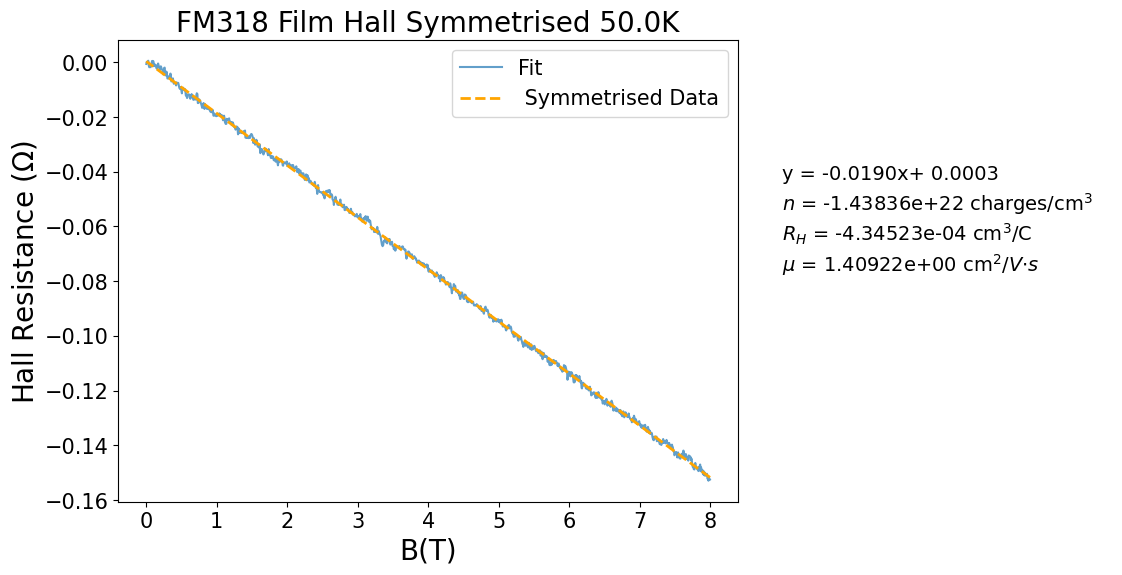

[-0.000000e+00  2.876000e-03  1.006600e-02 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


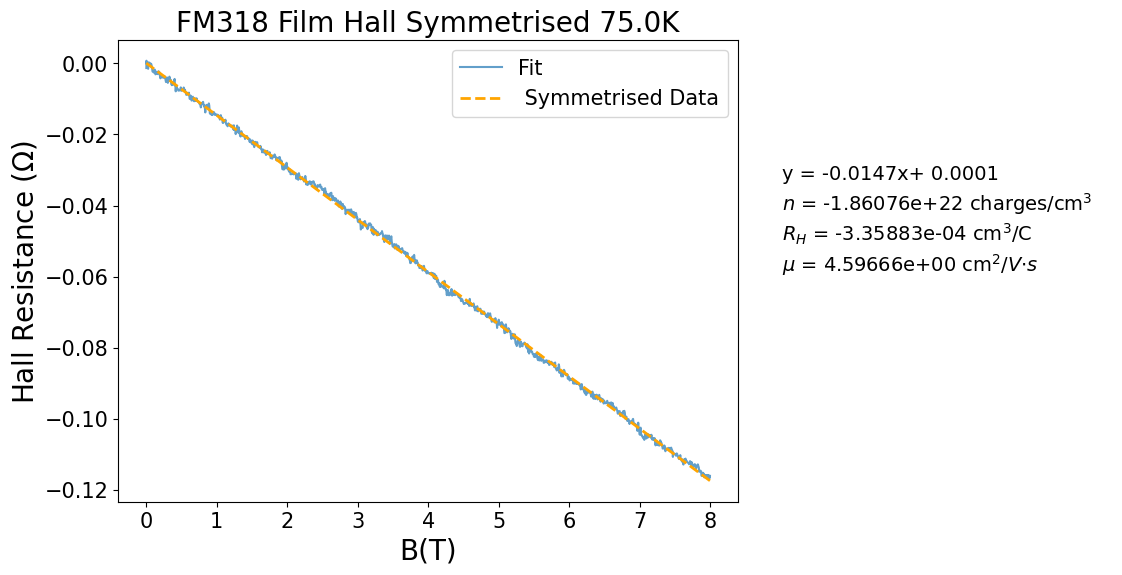

[-0.        0.008628  0.01438  ...  7.999594  7.999594  7.999594]


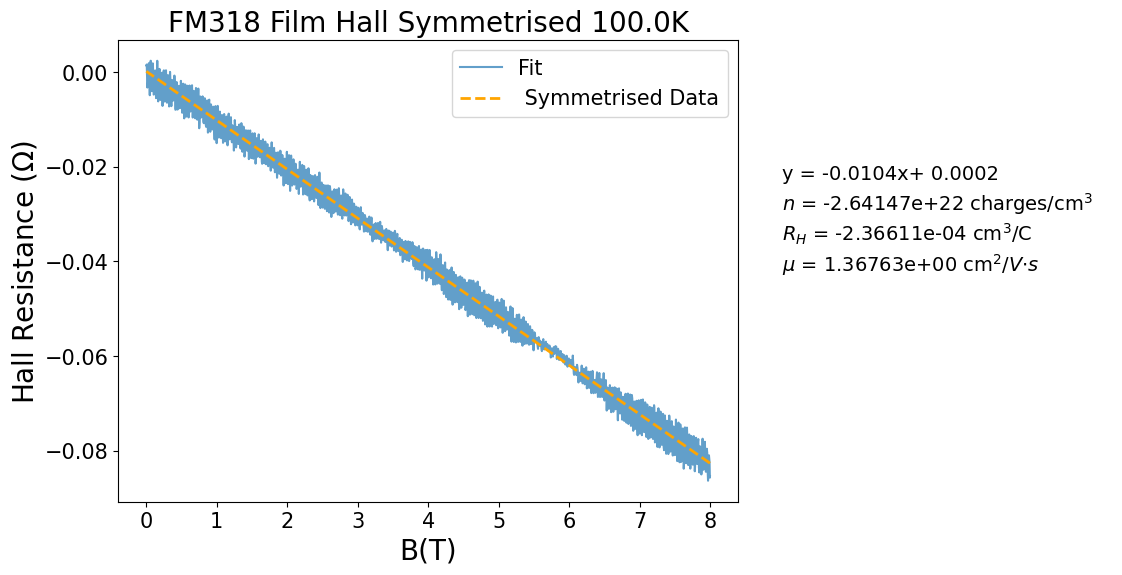

[-0.000000e+00  1.438000e-03  7.190000e-03 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


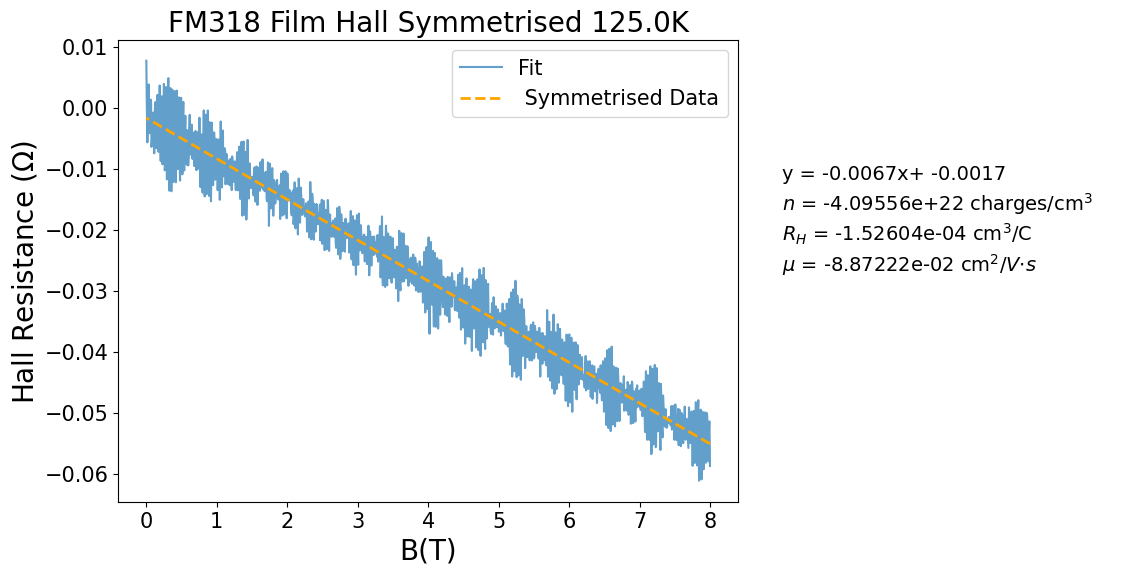

[-0.000000e+00  5.752000e-03  1.581800e-02 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


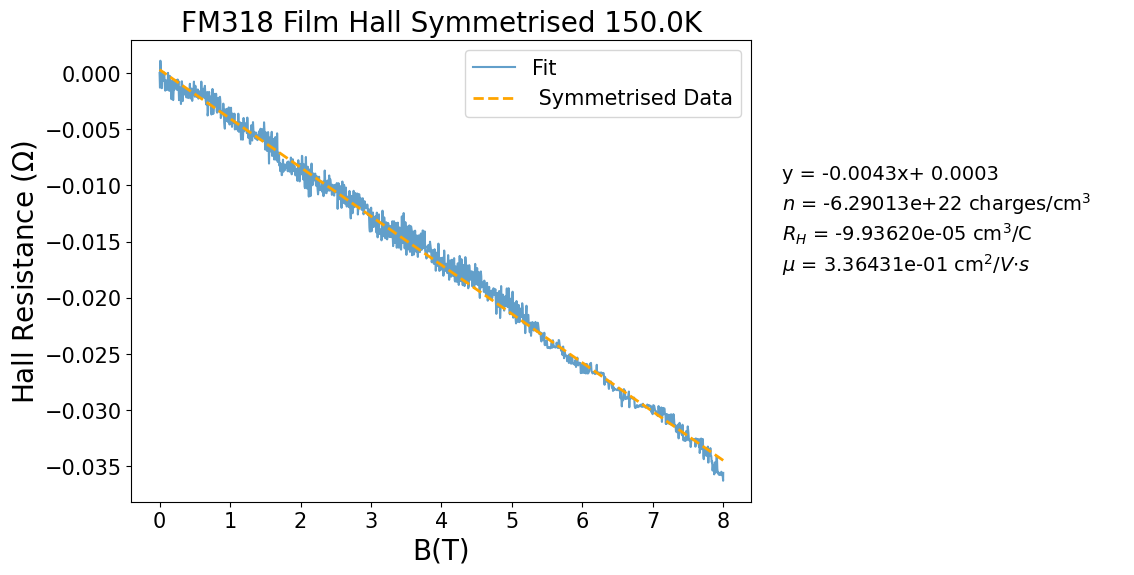

[-0.000000e+00  1.438000e-03  1.006600e-02 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


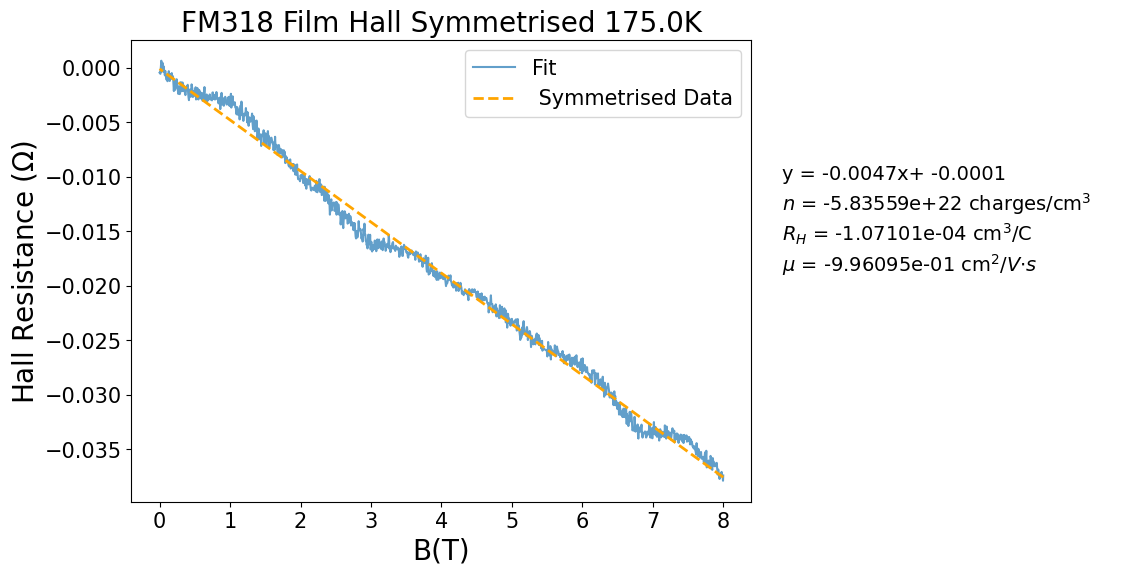

[-0.000000e+00  4.314000e-03  1.294200e-02 ...  7.979462e+00  7.986652e+00
  7.999594e+00]


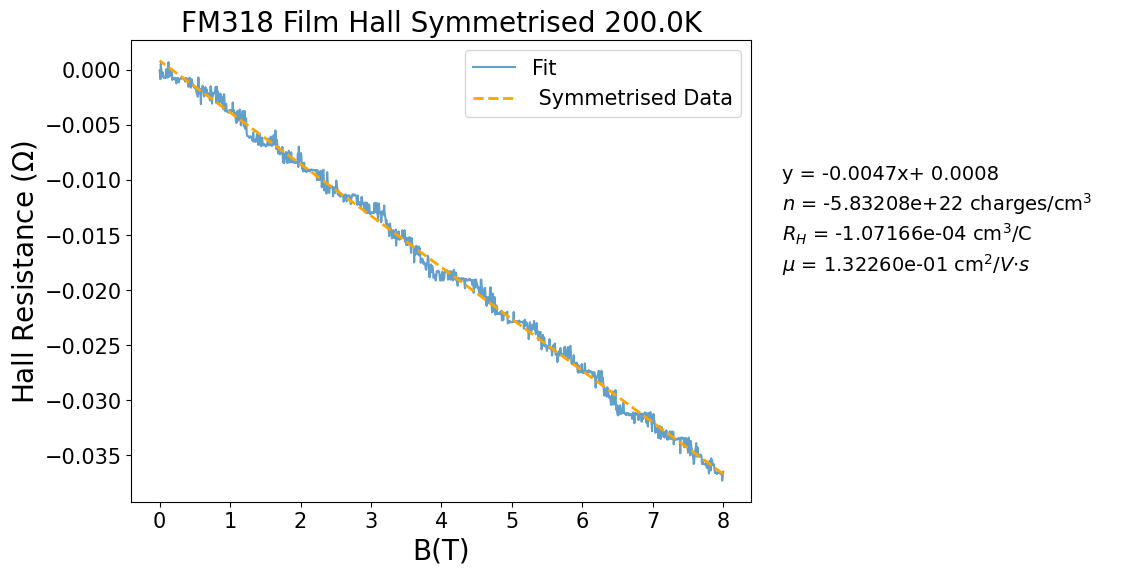

[-0.000000e+00  2.876000e-03  1.150400e-02 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


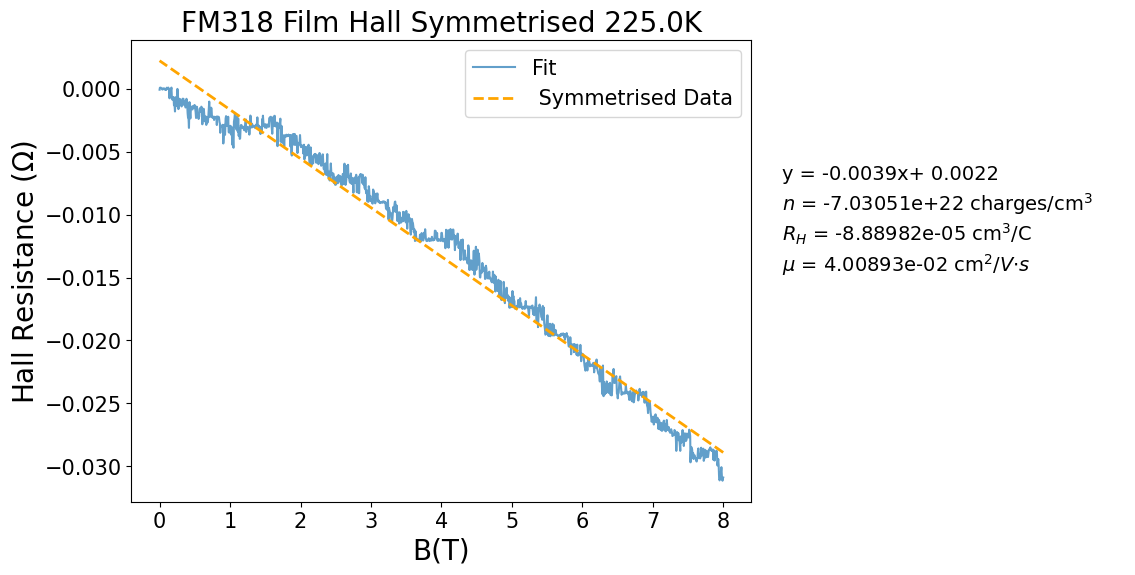

[0.000000e+00 5.752000e-03 1.150400e-02 ... 7.999594e+00 7.999594e+00
 7.999594e+00]


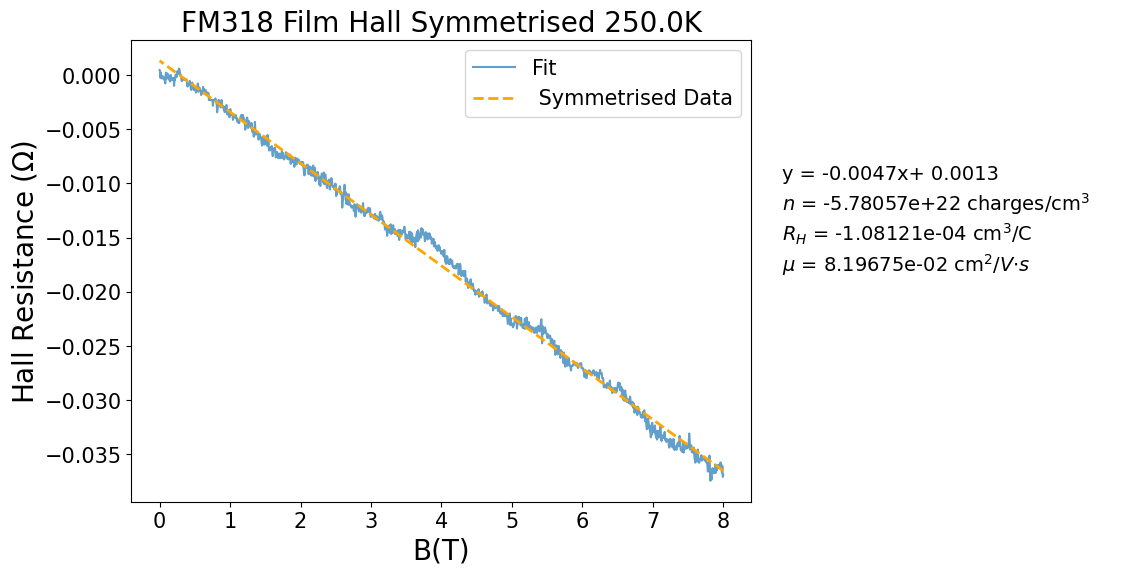

[-0.000000e+00  4.314000e-03  1.006600e-02 ...  7.996718e+00  7.998156e+00
  7.999594e+00]


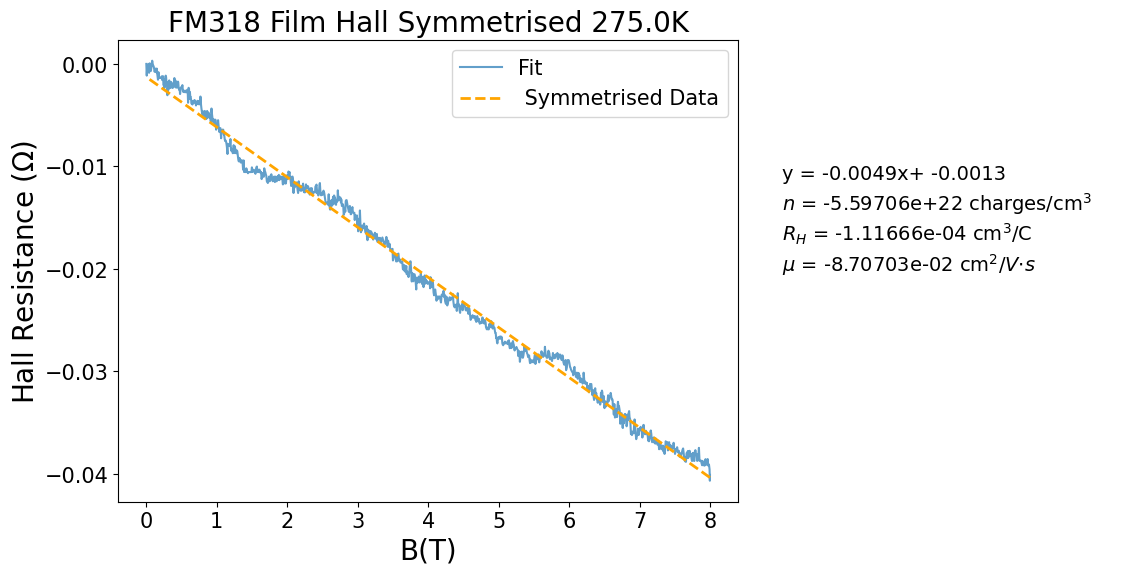

[-0.000000e+00  1.438000e-03  7.190000e-03 ...  7.999594e+00  7.999594e+00
  7.999594e+00]


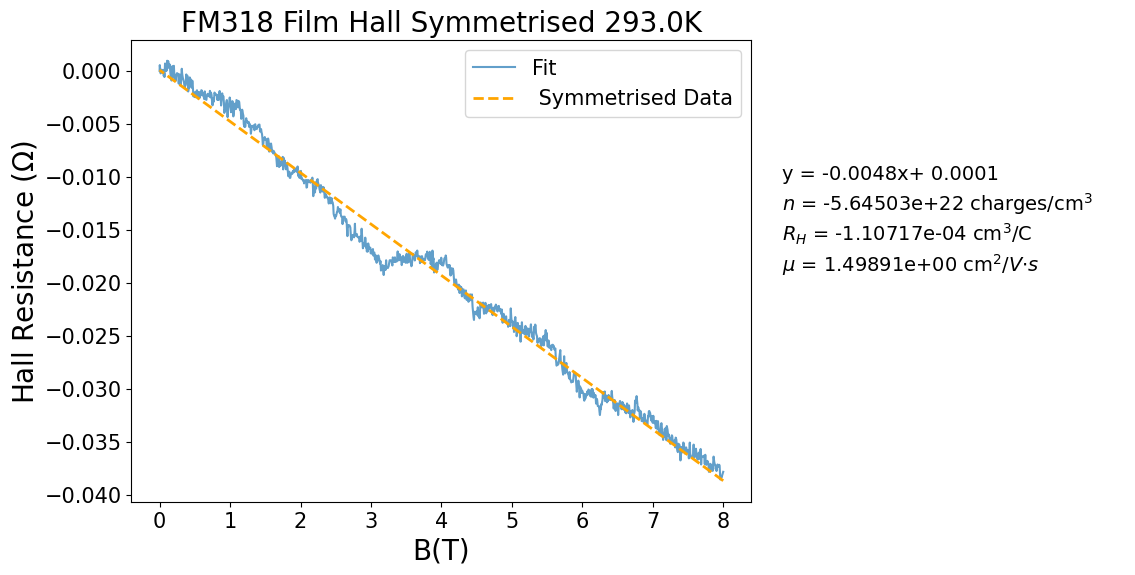

In [26]:
### Symmetrised branches in same sweep, so did 1-2 and 3-4. Then symmetrised those symmetrised branches with eachother, to account for thermal drift etc.

labels_temperature = findtemperature(pathlist_hall_film_cleaned)
labels_1 = ['Fit',' Symmetrised Data']

slopes = []
carrier_density = []
Hall_coefficient = []
mobility = []

q = 1.6E-19
d = 22.86E-9 # 60 uc NNO in meters


 
for i,data in enumerate(pathlist_hall_film_cleaned):
    

    fig = plt.figure(figsize=(8,6))

    dataextracted = dataextractorMagneto(data)
    B = dataextracted[8]
    resistance4pt = dataextracted[5]
    zero_B = int(closest_element_index(B,0)[0])
    #print(zero_B)
    resistance4pt = resistance4pt - resistance4pt[zero_B]
    resitivity4pt = resistance4pt * (np.pi/np.log(2)) * 22.86E-9   # Ohm per m

    
    
    B_max = np.max(B)  #The maximum B field in the dataset
    
    Delta_B = 0.005 # in Tesla
    pts = int(B_max / Delta_B+1) #These points are used later to create my simulated x-axis(aka.B Field)

    index_max = np.where(B>=B_max)[0] #The datapoints where the B field is at a maximum, so a few at the BEGINNING and a few at the END of the sweep
    index_min = np.where(B<=-B_max)[0] #The datapoints where the B field is at a minimum, so a few at the MIDDLE of the sweep

    MAX = index_max[int(len(index_max))-1] #Takes the last one of these points that are at the maximum. The -1 is there beacuse the slice function [A:B] starts from the point AFTER A and ends at the point one BEFORE B
    MIN = index_min[0] #Just picks the first value of these few points that are at the mimumum
    

    IZero=np.where(B==0)[0] #The index list of values you get at B=0. The [0] is there because without it it spits out an array that contains a list, when we just want the list(ie. the first element of that array)

    Imax=np.where(B==np.max(B))[0][0] #The (index of) the first value of the maximum of the B field(+10 here), ie. the beginning of the sweep, so [0][0] is the first element of that list which is the first element of the array
    Imin=np.where(B==np.min(B))[0][0] #The (index of) the first point of where the B field is at a minumum, ie. the middle of the sweep

    FZ=IZero[0] #The datapoint when you go through B=0 for the first time
    SZ=IZero[-1] #The datapoint when you go through B=0 for the second time


    Rxy_1 = resistance4pt[Imax:FZ+1] #The first branch of the sweep. You do +1 due to the slice notation not using inclusive values (explained above)
    B_1 = B[Imax:FZ+1] #The x-axis of this first branch

    Rxy_2 = resistance4pt[FZ:Imin+1] #The second branch of the sweep
    B_2 = B[FZ:Imin+1] #The x-axis of this second branch

    Rxy_3 = resistance4pt[Imin:SZ] #The third branch of the sweep
    B_3 = B[Imin:SZ] #The x-axis of this third branch

    Rxy_4 = resistance4pt[SZ::] #The fourth branch of the sweep
    B_4 = B[SZ::] #The x-axis of this fourth branch
    print(B_4)

    TM=np.where(B[Imax:FZ+1]==np.max(B[Imax:FZ+1]))[0] #At the beginning, (note also at the end), there are a few trailing values. Ie. the sweep will go 10,10,10,9.9,9.8 etc. This gives the index list of these values
    B_int = B[TM[-1]:FZ+1] #This gives the positive x-axis of the sweep (10 to 0) while only picking one of the trailing values. Note only the positive side is picked as when you sym/antisym the full data, it'll end up being only on one side 



    f_1 = interpolate.interp1d(B_1, Rxy_1) #This creates a linear interpolation (aka. a line between nearest neighbour points) of the data in the first branch
    Rxy_1_int = f_1(B_int) #This maps this line to the x-axis which will be common to all four branches

    f_3 = interpolate.interp1d(B_3, Rxy_3) #This creates a linear interpolation (aka. a line between nearest neighbour points) of the data in the third branch
    Rxy_3_int = f_3(-B_int) #This begins the mapping of this line to the x-axis which will be common to all four branches. The -B_int[::-1] means; so -B_int is -5, -4.9...-0. Then [::-1] means you reverse the order so -0, -0.1...-5. 
    #Rxy_3_int = Rxy_3_int[::-1] #You then reverse the order again, so you go from -5,-4.9...-0. This is because the last point of this branch needs to correspond to the first point of the fourth branch.

    f_2 = interpolate.interp1d(B_2, Rxy_2) #This creates a linear interpolation (aka. a line between nearest neighbour points) of the data in the second branch
    Rxy_2_int = f_2(-B_int[::-1]) #This begins the mapping of this line to the x-axis which will be common to all four branches. The -B_int[::-1] means; so -B_int is -5, -4.9...-0. Then [::-1] means you reverse the order so -0, -0.1...-5. 
    #Rxy_2_int = Rxy_2_int[::-1] #You then reverse the order again, so you go from -5,-4.9...-0. This is because the last point of this branch needs to correspond to the first point of the fourth branch.

    f_4 = interpolate.interp1d(B_4, Rxy_4) #This creates a linear interpolation (aka. a line between nearest neighbour points) of the data in the fourth branch
    Rxy_4_int = f_4(B_int[::-1]) #This maps this line to the x-axis which will be common to all four branches




    #Symmetrising the data using the four interpolated branches

    Sym_14_pos = (Rxy_1_int + Rxy_4_int[::-1])/2
    
    Sym_23_pos = (Rxy_2_int + Rxy_3_int[::-1])/2
    
    Sym_total = (Sym_14_pos - Sym_23_pos[::-1])/2
    
    #Sym_total = (Sym_12_pos + Sym_34_pos)/2
    #Sym_total_neg = -Sym_total

    #Sym_13_neg = -Sym_13_pos #Because Symmetrising the data converts the 4 branches into two, I've done it so that they map to the positive x axis. Thus for display reasons I am taking the negative of these branches to display the 'full curve'
    #Sym_24_neg = -Sym_24_pos
    
    
    # Debugging    ###############################
    
    #print("i",i)
    #print("data",data)
    #print(str(labels_temperature[i]))
    
    #plt.plot(B_int,Rxy_1_int)
    #plt.plot(B_int,Rxy_2_int[::-1])
    #plt.plot(B_int,Sym_12_pos)
    
    #plt.plot(B_int,Rxy_3_int[::-1])
    #plt.plot(B_int,Rxy_4_int)
    #plt.plot(B_int,Sym_34_pos)
    
    #plt.plot(B_int,Sym_total)

    
    #print('Rxy_1_int',Rxy_1_int)
    #print('Rxy_3_int',Rxy_3_int)
    #print('Sym_14_pos',Sym_14_pos)
    #print('Rxy_2_int',Rxy_2_int)
    #print('Rxy_4_int',Rxy_4_int)
    #print('Sym_24_pos',Sym_24_pos)
    
    
    ### Legacy Code ##############################
    #full_curve = np.append(Sym_14_pos,Sym_23_neg[::-1])
    #full_curve1 = np.append(full_curve,Sym_23_neg)
    #full_curve2 = np.append(full_curve1,Sym_23_pos[::-1])
    #full_B = np.append(B_int,-B_int[::-1])
    #full_B1 = np.append(full_B,-B_int)
    #full_B2 = np.append(full_B1,B_int[::-1])
    
    
    #---Combining the 4 Symmetrised branches into one full curve---
    
    #full_curve = np.append(Sym_total,Sym_total[::-1])
    #print('Sym_total[::-1]',Sym_total[::-1])
    #full_B_line = np.append(B_int,-B_int[::-1])
    #print('-B_int[::-1]',-B_int[::-1])
    
    #######################################################################################

    #Plotting it and calculating parameters
    #Sym_total = np.flip(Sym_total)
    #B_int = np.flip(B_int)

    
    
    plt.plot(B_int, (Sym_total), alpha = 0.7) #* 1E8, alpha = 0.3) # (ONLY) plotting muOhm.cm
    plt.legend(labels = str(labels_temperature[i]))
    a, b = np.polyfit(B_int,Sym_total , 1)
    fit = a*B_int + b
    plt.plot(B_int, (a*B_int + b), linestyle = "--", linewidth = 2, color = 'orange') #*1E8 # (ONLY) plotting muOhm.cm
    slopes = np.append(slopes,a)
    R_H = a * d * 1E6 # Going from m3/C to cm3/C
    Hall_coefficient = np.append(Hall_coefficient,R_H)
    n = 1/((R_H)*q)
    carrier_density = np.append(carrier_density,n)
    mu = (-R_H/fit[-1])#*1E-6)
    mobility = np.append(mobility,mu)
    plt.legend(labels = labels_1, fontsize = 15)
    plt.title("FM318 Film Hall Symmetrised" + " " +  str(labels_temperature[i]) + "K" ,fontsize = 20)
    plt.ylabel(r'Hall Resitivity ($\Omega$⋅m)',fontsize =20)
    plt.ylabel(r'Hall Resistance ($\Omega$)',fontsize =20)
    plt.xlabel("B(T)",fontsize =20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.text(1.1,0.5, 'y = ' + '{:.4f}'.format(a) + 'x'  '+ {:.4f}'.format(b) , size=14,transform = ax.transAxes)
    plt.text(1.1,0.45, '$n$ = ' + '{:.5e}'.format(n) + ' charges/cm$^{3}$ ', size=14,transform = ax.transAxes)
    plt.text(1.1,0.4, '$R_{H}$ = ' + '{:.5e}'.format(R_H) + ' cm$^{3}$/C', size=14,transform = ax.transAxes)
    plt.text(1.1,0.35, '$\mu$ = ' + '{:.5e}'.format(mu) + ' cm$^{2}/V⋅s$ ', size=14,transform = ax.transAxes)
    
    plt.show()



# Parameters vs T #

## R_H vs T ##

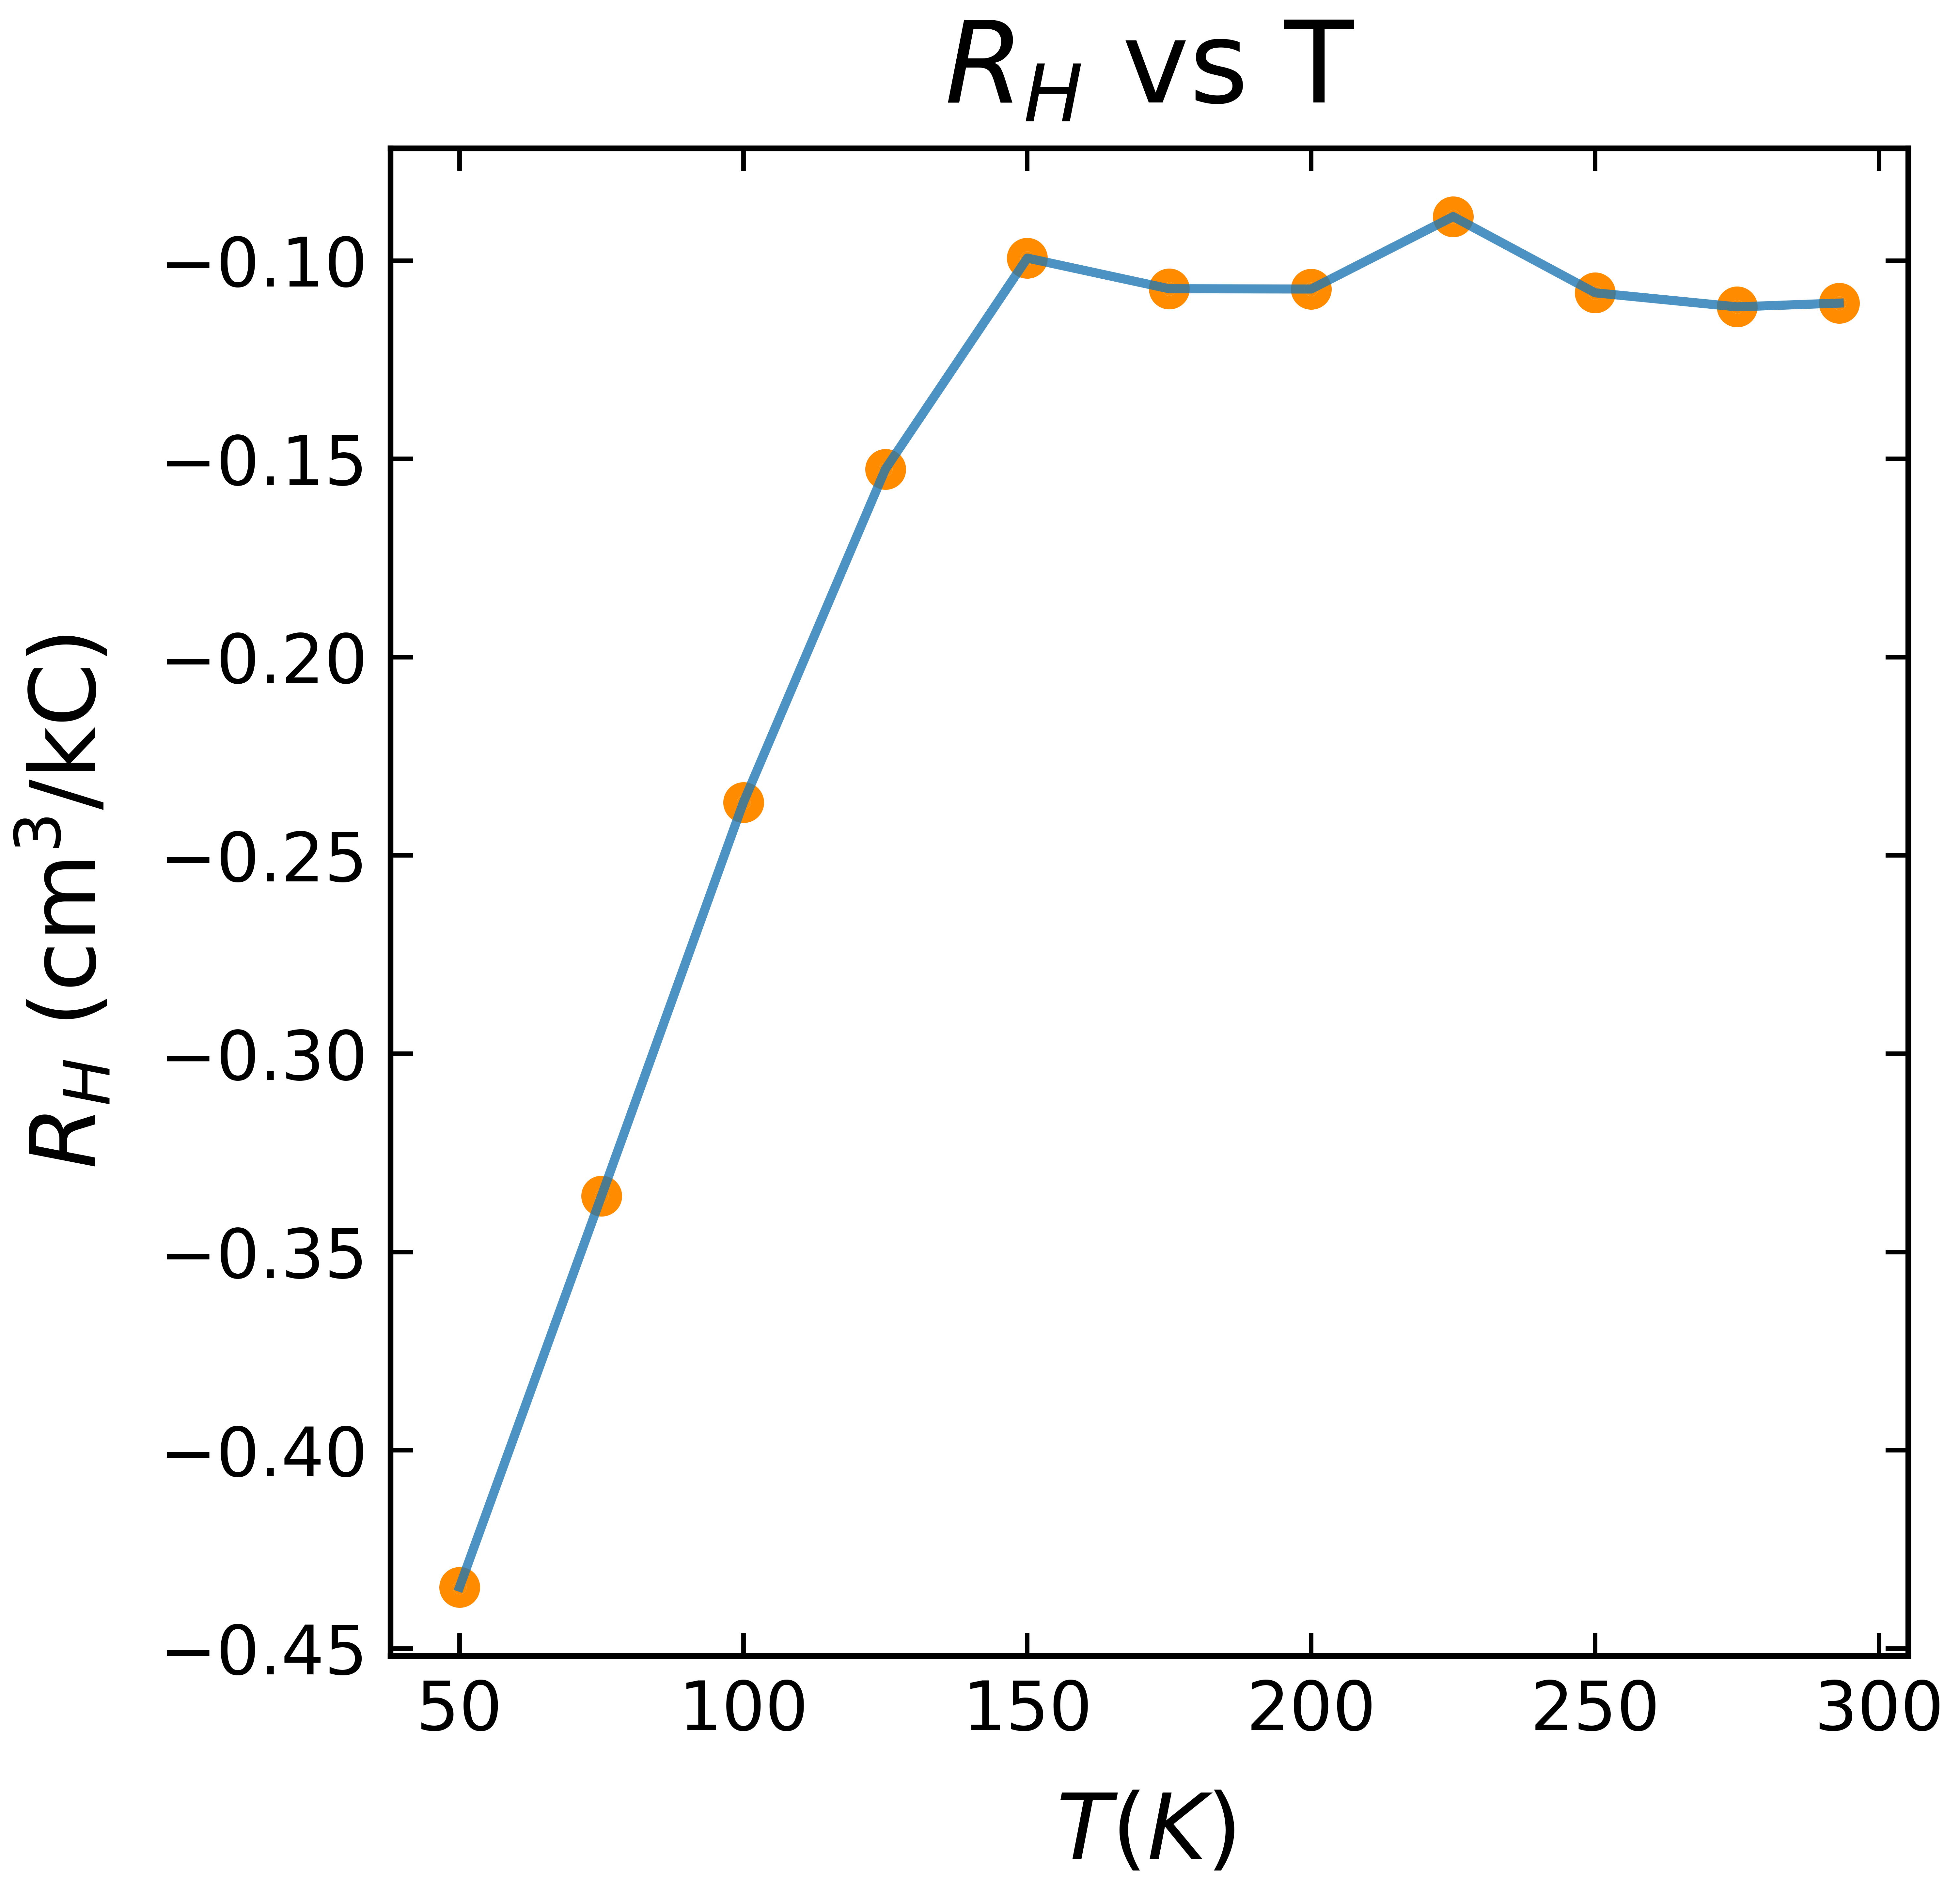

In [27]:
fig,ax = plt.subplots(figsize=(12,12), dpi = 500)

temperature_list = findtemperature(pathlist_hall_film_cleaned)
plt.scatter(temperature_list,Hall_coefficient*1E3, linewidth = 12, color = "darkorange")
plt.plot(temperature_list,Hall_coefficient*1E3, alpha = 0.8, lw = 4)

plt.title(r'$R_{H}$ vs T',fontsize = 50, pad = 20)
plt.ylabel(r'$R_{H}$ (cm$^{3}$/kC)',fontsize =40, labelpad = 20)
plt.xlabel("$T(K)$ ",fontsize =40,labelpad = 20)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)

ax.spines["top"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_linewidth(2.5)
ax.spines["left"].set_linewidth(2.5)

ax.tick_params(axis = 'x', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, top = True)
ax.tick_params(axis = 'y', which='major', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)
ax.tick_params(axis = 'y', which='minor', labelsize=30, length = 10, width = 2, direction = 'in', pad = 10, right = True)

pd.DataFrame({'temperature':temperature_list,'Hall_coefficient':Hall_coefficient}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\Hall\1st Set\Rh\ ' + 
'FM318' + '_' + 'Hall_Coeficient' + '.csv')

#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_R_H_vs_T.png",bbox_inches = "tight")
#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318_Film_R_H_vs_T.pdf",bbox_inches = "tight", format = "pdf")

#print(Hall_coefficient)


## n vs T ##

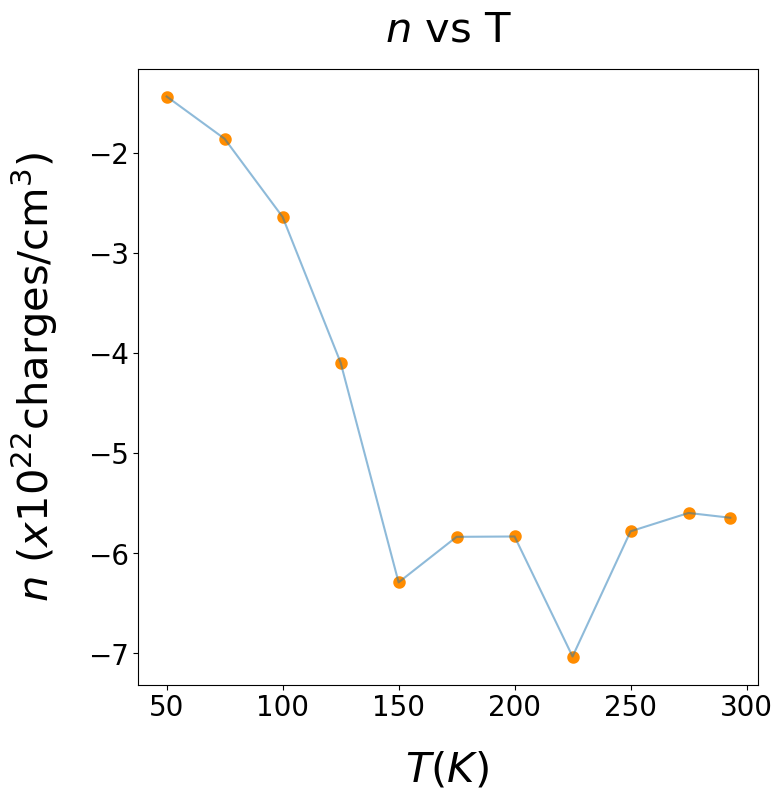

In [28]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

plt.scatter(temperature_list,carrier_density, linewidth = 3, color = "darkorange")
plt.plot(temperature_list,carrier_density, alpha = 0.5)

plt.title(r'$n$ vs T',fontsize = 30, pad = 20)
plt.ylabel(r'$n$ ($x10^{22}$charges/cm$^{3}$)',fontsize =30, labelpad = 20)
plt.xlabel("$T(K)$ ",fontsize =30,labelpad = 20)
ax.yaxis.get_offset_text().set_visible(False)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

pd.DataFrame({'temperature':temperature_list,'carrier_density':carrier_density}).to_csv(r'C:\Users\pblah\Data\Navy Beach\Data for Combined Plots NNO\Hall\1st Set\n\ ' + 
'FM318' + '_' + 'carrier_density' + '.csv')

#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318 Film n vs T",bbox_inches = "tight")

(array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

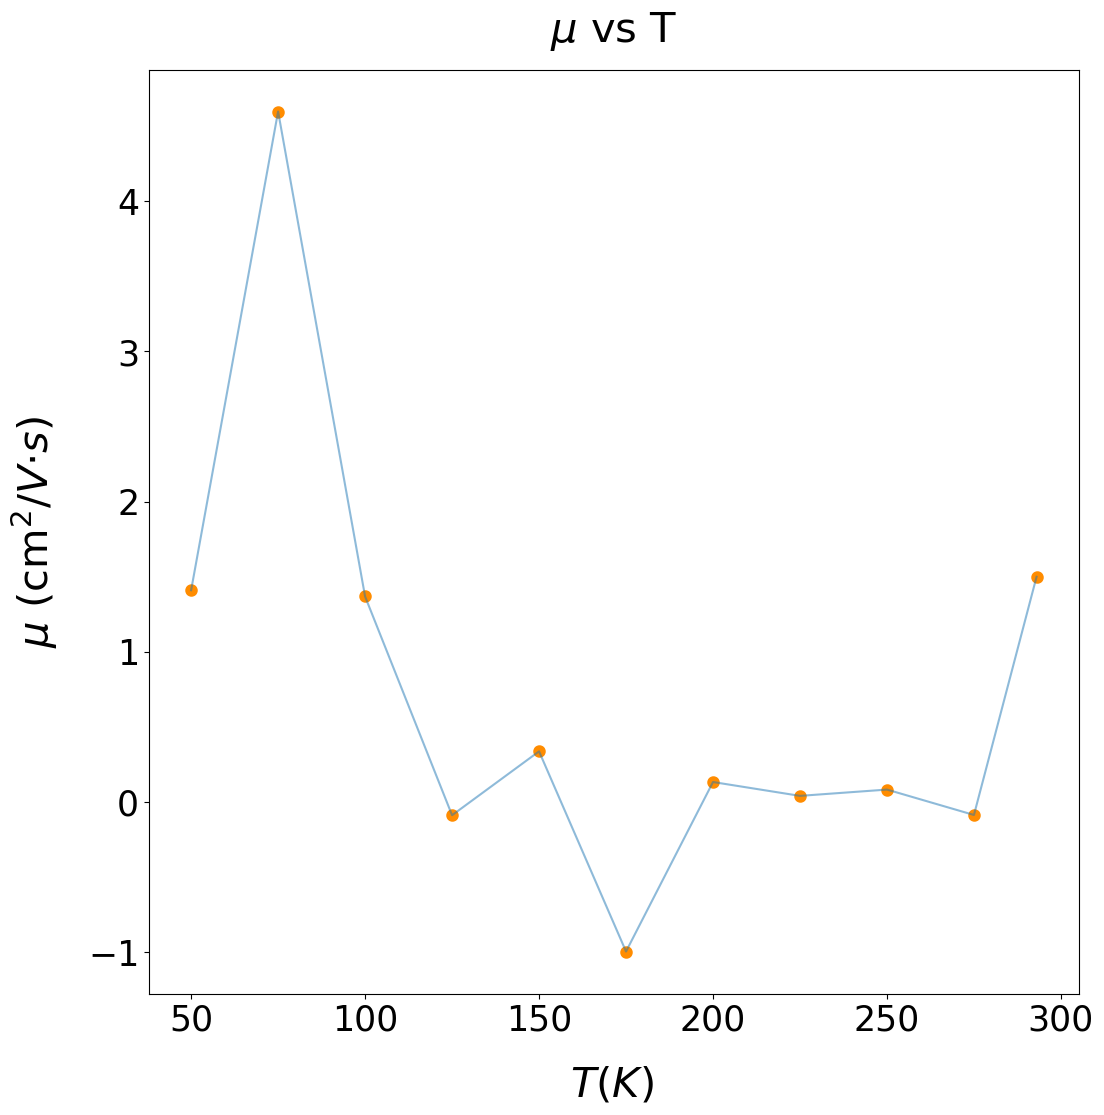

In [12]:
fig = plt.figure(figsize=(12,12))
plt.scatter(temperature_list,mobility, linewidth = 3, color = "darkorange")
plt.plot(temperature_list,mobility, alpha = 0.5)

plt.title(r'$\mu$ vs T',fontsize = 30, pad = 20)
plt.ylabel(r'$\mu$ (cm$^{2}/V⋅s$)',fontsize =30, labelpad = 20)
plt.xlabel("$T(K)$ ",fontsize =30,labelpad = 20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

#plt.savefig(r"C:\Users\pblah\Data\Navy Beach\FM318\Figures\FM318 Film mu vs T",bbox_inches = "tight")